# Whatsapp Chat Visualization PDD.DA'19

In [144]:
#import necessory file 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import pandas as pd
from bokeh.io import output_file, show, output_notebook
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum
import altair as alt
from vega_datasets import data
alt.renderers.enable('default')
import calendar
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from IPython.display import Image
import ipywidgets as widgets
from ipywidgets import interact

In [145]:
#import data
data = pd.read_csv(r"WhatsApp Chat with PDD.DA’19.txt", error_bad_lines=False)

b'Skipping line 58: expected 2 fields, saw 3\nSkipping line 78: expected 2 fields, saw 3\nSkipping line 94: expected 2 fields, saw 3\nSkipping line 114: expected 2 fields, saw 3\nSkipping line 115: expected 2 fields, saw 3\nSkipping line 133: expected 2 fields, saw 3\nSkipping line 187: expected 2 fields, saw 3\nSkipping line 189: expected 2 fields, saw 3\nSkipping line 197: expected 2 fields, saw 3\nSkipping line 265: expected 2 fields, saw 3\nSkipping line 272: expected 2 fields, saw 3\nSkipping line 292: expected 2 fields, saw 3\nSkipping line 293: expected 2 fields, saw 3\nSkipping line 295: expected 2 fields, saw 3\nSkipping line 296: expected 2 fields, saw 3\nSkipping line 332: expected 2 fields, saw 4\nSkipping line 343: expected 2 fields, saw 3\nSkipping line 349: expected 2 fields, saw 3\nSkipping line 352: expected 2 fields, saw 3\nSkipping line 357: expected 2 fields, saw 3\nSkipping line 360: expected 2 fields, saw 3\nSkipping line 377: expected 2 fields, saw 3\nSkipping li

In [146]:
Image(url='whatsapp.gif') 

In [147]:
# First View of Data
data.head()

05/09/2019  \
0  03/09/2019   
1  05/09/2019   
2  05/09/2019   
3  05/09/2019   
4  05/09/2019   

   4:29 pm - Messages to this group are now secured with end-to-end encryption. Tap for more info.  
0   5:34 pm - rashman ###### created group "#####...                                                
1                 4:29 pm - rashman ###### added you                                                
2     4:30 pm - rashman ###### added +91 82190 16358                                                
3                      4:30 pm - You're now an admin                                                
4   9:07 pm - dharun cls: Does anyone have any id...

In [148]:
# checking columns in the data 
data.columns

Index(['05/09/2019', ' 4:29 pm - Messages to this group are now secured with end-to-end encryption. Tap for more info.'], dtype='object')

In [149]:
# Renaming columns 
data.rename(columns = {"05/09/2019":"Date"," 4:29 pm - Messages to this group are now secured with end-to-end encryption. Tap for more info.":"info"}, inplace = True)

In [150]:
# Spliting info into Time and Message
new = data["info"].str.split("-", n = 1, expand = True) 
# making separate first name column from new data frame 
data["Time"]= new[0] 
  
# making separate last name column from new data frame 
data["Message"]= new[1] 
  
# Dropping old Name columns 
data.drop(columns =["info"], inplace = True) 
  
# df display 
data.head()

Date       Time                                            Message
0  03/09/2019   5:34 pm        rashman ###### created group "###### ######"
1  05/09/2019   4:29 pm                            rashman ###### added you
2  05/09/2019   4:30 pm                rashman ###### added +91 82190 16358
3  05/09/2019   4:30 pm                                 You're now an admin
4  05/09/2019   9:07 pm    dharun cls: Does anyone have any idea how to ...

In [151]:
# Seprating Message into Name and Messages 
# new data frame with split value columns 
new = data["Message"].str.split(":", n = 1, expand = True) 
  
# making separate first name column from new data frame 
data["Name"]= new[0] 
  
# making separate last name column from new data frame 
data["Messages"]= new[1] 
  
# Dropping old Name columns 
data.drop(columns =["Message"], inplace = True) 
  
# df display 
data.head()

Date       Time                                           Name  \
0  03/09/2019   5:34 pm    rashman ###### created group "###### ######"   
1  05/09/2019   4:29 pm                        rashman ###### added you   
2  05/09/2019   4:30 pm            rashman ###### added +91 82190 16358   
3  05/09/2019   4:30 pm                             You're now an admin   
4  05/09/2019   9:07 pm                                      dharun cls   

                                            Messages  
0                                               None  
1                                               None  
2                                               None  
3                                               None  
4   Does anyone have any idea how to solve ######...

In [152]:
#Removing null values 
data.dropna(inplace=True)

In [153]:
#check unique students
data.Name.nunique()

31

In [154]:
#list of the Names from series value_counts object
UniqueList =data["Name"].value_counts().keys().to_list()
print(UniqueList)

[' kirra', ' Roberta ######', ' dharun cls', ' jaspreet cls ######', ' vasu', ' kiran kumar cls', ' Amir ######', ' arsh ######', ' jasman cls', ' tuli ######', ' naval clss', ' cici', ' Vedant ######', ' rashman ######', ' nikita ######', ' harshad cls', ' Kania ######', ' aditi jaswal', ' Kiran Gill', ' david ######', ' vivek reddy', ' Beth ######', ' Prerna ######', ' Edward', ' navjot ######', ' minoj bishnoi ######', ' Nicky ######', ' Harshad ######', ' +91 79884 37459', ' +91 82190 16358', ' +91 90414 65914']


In [155]:
data['Name'].replace(to_replace = [' dharun cls',
 ' vasu',
 ' vivek reddy',
 ' +91 90414 65914',
 ' rashman canada',
 ' jaspreet cls canada',
 ' tuli class',
 ' Prerna Langara',
 ' +91 82190 16358',
 ' nikita langara',
 ' navjot canada',
 ' Kiran Gill',
 ' arsh langara',
 ' Edward',
 ' jasman cls',
 ' kirra',
 ' Roberta Langara',
 ' Harshad Langara',
 ' minoj bishnoi langara',
 ' Vedant Langara',
 ' kiran kumar cls',
 ' Beth Langara',
 ' aditi jaswal',
 ' naval clss',
 ' david langara',
 ' harshad cls',
 ' Amir Langara',
 ' Kania Langara',
 ' Nicky Langara',
 ' cici',
 ' +91 79884 37459'], value = ['Dharun',
                               'Vasu',
                               'Vivek',
                               '+91 90414 65914',
                               'Rashman',
                                ' Jaspreet',
 ' Tuli ',
 ' Prerna',
 ' +91 82190 16358',
 ' Nikita ',
 ' Navjot ',
 ' Kiran ',
 ' Arsh ',
 ' Edward',
 ' Jasman',
 ' Kirra',
 ' Roberta',
 ' Harshad',
 ' Manoj',
 ' Vedant ',
 ' Kiran',
 ' Beth',
 ' Aditi',
 ' Naval',
 ' David',
 ' Harshad',
 ' Amir',
 ' Kania',
 ' Nicky',
 ' Cici',
 ' Manoj'],inplace=True)

In [156]:
#total unique Names in Data frame 
len(data.Name.unique())

31

In [161]:
#for privacy reason we replace text meassage with 22.
data.Messages = 22

In [162]:
# Exporting Data 
data.to_csv("Chat.csv", index =False)

In [163]:
# Display Head 
data.head()

Date       Time    Name  Messages
4   05/09/2019   9:07 pm   Dharun        22
6   05/09/2019   9:08 pm   Dharun        22
8   05/09/2019   9:09 pm   Dharun        22
9   05/09/2019   9:10 pm   Dharun        22
10  05/09/2019   9:10 pm     Vasu        22

In [164]:
# Converting Date into datetime 
data['Date'] =  pd.to_datetime(data['Date'],format="%d/%m/%Y")

In [165]:
# Creating a Function to convert 12 Hours format to 24 Hours format.
def t(x):
    if x[-3:-1]=='pm' and x.split(':')[0][1:3]=='12':
        return(x[1:6])
    if x[-3:-1]=='pm' and x.split(':')[0][:2]!='12':
        return(str(int(x.split(':')[0])+12)+str(':')+str(x.split(':')[1][:2]))
    if x[-3:-1]=='am' and x.split(':')[0][1:3]=='12':
        return(str('00')+str(':')+str(x.split(':')[1][:2]))
    if x[-3:-1]=='am' and x.split(':')[0][:2]!='12' and x.split(':')[0][1:3]!='10' and x.split(':')[0][1:3]!='11':
        return(x[1:5])
    if x[-3:-1]=='am' and x.split(':')[0][1:3]=='10':
        return(x[1:6])
    if x[-3:-1]=='am' and x.split(':')[0][1:3]=='11':
        return(x[1:6])

In [166]:
# Applying function on Time using lambda 
data['Time'] = data['Time'].apply(lambda x: t(x))

In [167]:
# Display head of the data 
data.head()

Date   Time    Name  Messages
4  2019-09-05  21:07  Dharun        22
6  2019-09-05  21:08  Dharun        22
8  2019-09-05  21:09  Dharun        22
9  2019-09-05  21:10  Dharun        22
10 2019-09-05  21:10    Vasu        22

In [168]:
# Convert Time columnn to date time format
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M')

In [169]:
# checking data type 
data.dtypes

Date        datetime64[ns]
Time        datetime64[ns]
Name                object
Messages             int64
dtype: object

In [170]:
data1 = data 

In [171]:
data1.head()

Date                Time    Name  Messages
4  2019-09-05 1900-01-01 21:07:00  Dharun        22
6  2019-09-05 1900-01-01 21:08:00  Dharun        22
8  2019-09-05 1900-01-01 21:09:00  Dharun        22
9  2019-09-05 1900-01-01 21:10:00  Dharun        22
10 2019-09-05 1900-01-01 21:10:00    Vasu        22

In [172]:
# As we can see Time column contain some extra value that look like some date 
# we will merge Date and Time column

# creating a period column that contain string values of therir respectivve date and tiem column
data1["period"] = data1["Date"].astype(str) +"/"+ data1["Time"].astype(str)
period = data1["period"].to_list()

In [173]:
# Creating a list Datetime with cleaned values
DateTime = []
for i in period:
    DateTime.append(i[0:10]+" "+i[22:])
    
# Creating a Date column with right format
data1['Date'] =  pd.to_datetime(DateTime,format="%Y-%m-%d %H:%M:%S")

# Droping Time & period Columns 
data1.drop("Time", axis = 1, inplace =True)
data1.drop("period", axis = 1, inplace =True)

# Displaying Head 
data1.head()

Date    Name  Messages
4  2019-09-05 21:07:00  Dharun        22
6  2019-09-05 21:08:00  Dharun        22
8  2019-09-05 21:09:00  Dharun        22
9  2019-09-05 21:10:00  Dharun        22
10 2019-09-05 21:10:00    Vasu        22

In [174]:
#Creating a Weekday column 
data1['Weekdays'] = data1['Date'].dt.day_name()
data1.head()

Date    Name  Messages  Weekdays
4  2019-09-05 21:07:00  Dharun        22  Thursday
6  2019-09-05 21:08:00  Dharun        22  Thursday
8  2019-09-05 21:09:00  Dharun        22  Thursday
9  2019-09-05 21:10:00  Dharun        22  Thursday
10 2019-09-05 21:10:00    Vasu        22  Thursday

In [175]:
data1.to_csv(r"FinalData.csv", index = False)

# Total Messages count per Student

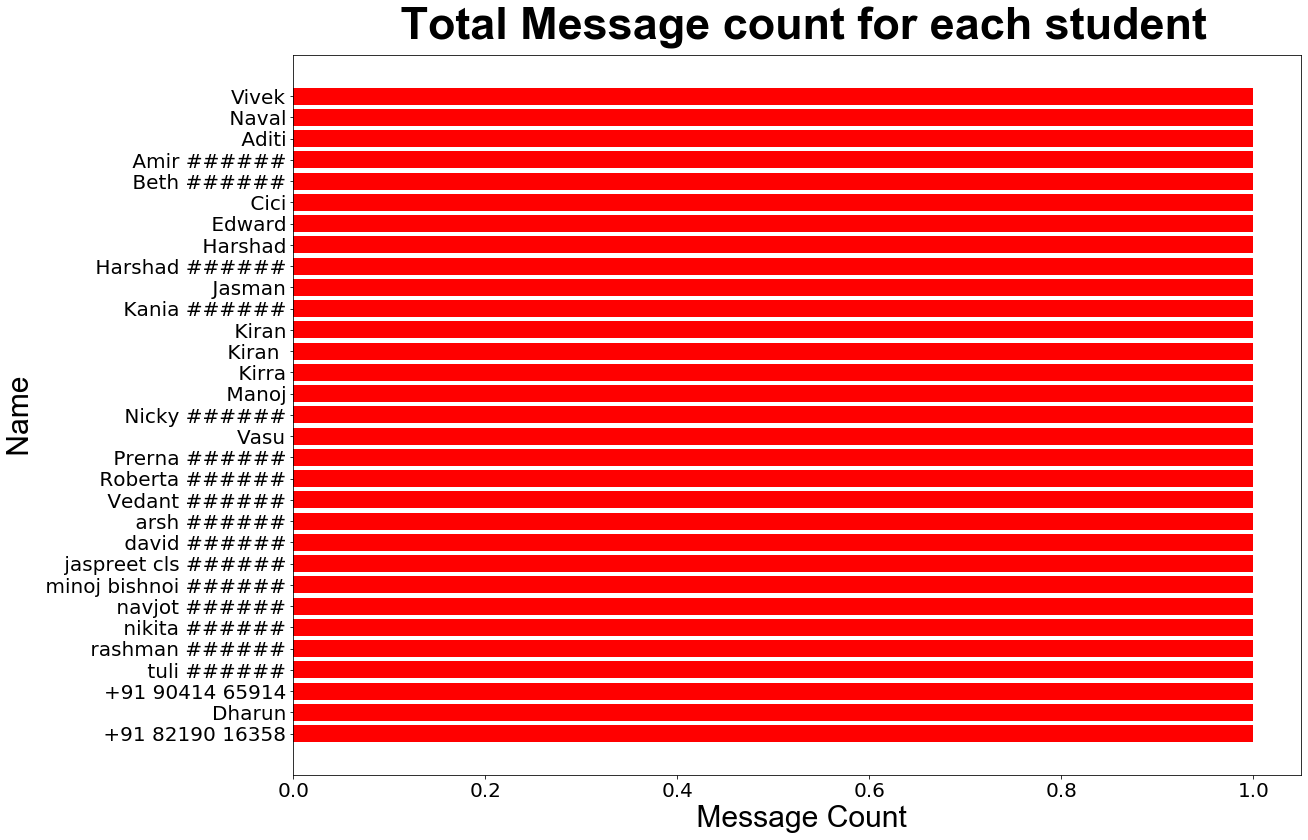

In [176]:
# Total Messages count per Student 

#Groupby by names to get total number of messages 
Total_number_of_messages=pd.DataFrame(data1.groupby("Name")["Messages"].nunique())

#Creating a sorted dataframe 
Total_number_of_messages =pd.DataFrame(Total_number_of_messages["Messages"].sort_values(ascending=True))

# Simple horizontal Plot
fig = plt.figure(figsize=(14,10))
ax = fig.add_axes([0,0,1,1])

# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'45', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'30'}

# Set Label and Title 
plt.xlabel(" Message Count", **axis_font)
plt.ylabel(" Name ", **axis_font)
plt.title(" Total Message count for each student", **title_font)


# Set Tick label Size 
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

ax.barh(Total_number_of_messages.index,Total_number_of_messages.Messages, color = "Red")
plt.show()

In [177]:
Image(url='mostmsg.gif') 

# Total Message count on Weekdays

In [178]:
data_Weekdays_Count=pd.DataFrame(data1.groupby('Weekdays').Messages.count())
sorter = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
sorterIndex = dict(zip(sorter,range(len(sorter))))

data_Weekdays_Count['Weekday'] = data_Weekdays_Count.index
data_Weekdays_Count['Weekday'] = data_Weekdays_Count['Weekday'].map(sorterIndex)
data_Weekdays_Count.sort_values('Weekday',inplace=True)
fig = plt.figure(figsize=(9,4))
ax = fig.add_axes([0,0,1,1])
ax.bar(data_Weekdays_Count.index,data_Weekdays_Count.Messages,color="blue")
plt.show()

# Number of Message per Term

In [179]:
#Message Count for term 1
Term1=data1[(data1.Date.dt.month>=9) & (data1.Date.dt.month<=12) &
                                                (data1.Date.dt.year == 2019)].groupby('Name').Messages.count().sum()
#Message Count for term 2
Term2= data1[(data1.Date.dt.month>=1) & (data1.Date.dt.month<=4) &
                                                (data1.Date.dt.year == 2020)].groupby('Name').Messages.count().sum()
#Message Count fo term 3
Term3=data1[(data1.Date.dt.month>=5) & (data1.Date.dt.month<=7) &
                                                (data1.Date.dt.year == 2020)].groupby('Name').Messages.count().sum()
#Preparing DataFrame
x = {"Term1": Term1,"Term2": Term2,"Term3": Term3}
x= pd.DataFrame.from_dict(x,orient='index')
x.reset_index(inplace=True)
x.rename(columns={"index": "Term", 0: "Count"},inplace=True)

data=x
data['angle'] = data['Count']/data['Count'].sum() * 2*pi
data['color'] = Category20c[len(x)]
data['percent'] = (data['Count'] / x.Count.sum()) * 100

p = figure(plot_height=600, title="Total Persentage of messages in Each Term", toolbar_location=None,
        tools="hover", tooltips="@Term: @percent{0.2f} %")

p.wedge(x=0, y=0, radius=0.95,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="black", fill_color='color', source=data)

p.axis.visible = False

output_notebook()
show(p)

Loading BokehJS ...

# Number of messages during CPSC lecture

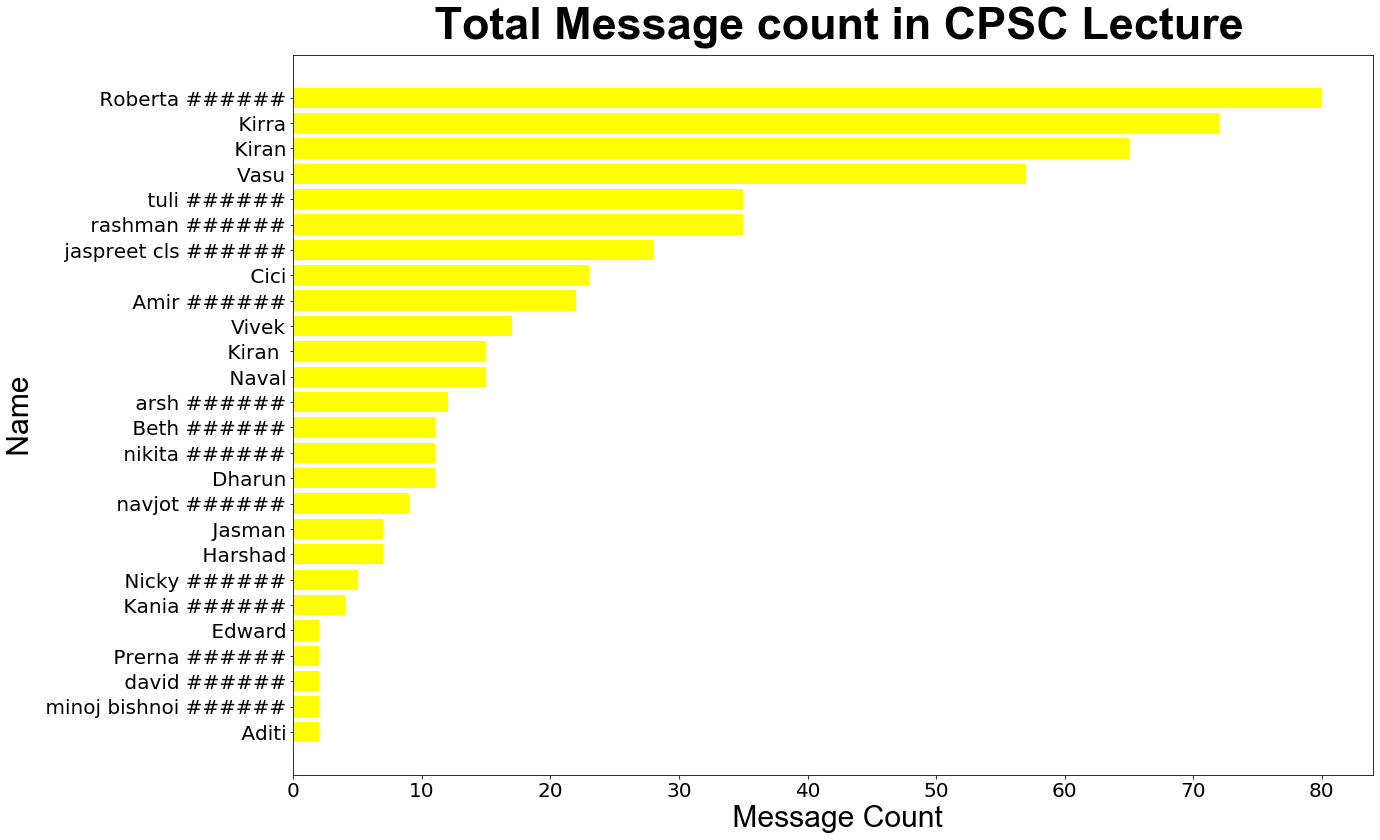

In [180]:
#Groupby by names to get total number of messages in term3

#creating a data frame for Term 3 and for Monday
Total_number_of_messages_term3=pd.DataFrame(data1[(data1.Date.dt.month>=5) & (data1.Date.dt.month<=7) &
                                                (data1.Date.dt.year == 2020) & 
                                                 (data1.Weekdays == "Monday") 
                                               ])

# set date as index because in next step we need to filter data as per time 
Total_number_of_messages_term3.set_index("Date", inplace= True)

# filtering data as per time and 
#creating a new data frame for the messages count in between 4:30 PM and 6:30 pm
Total_number_of_messages_term3 =pd.DataFrame(Total_number_of_messages_term3.between_time("16:30",
    "18:30").groupby("Name").Messages.count())


#Creating a sorted dataframe in term3
Total_number_of_messages_term3 =pd.DataFrame(Total_number_of_messages_term3["Messages"].sort_values(ascending=True))

# Simple horizontal Plot for term3
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])

# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'45', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'30'}

# Set Label and Title 
plt.xlabel(" Message Count", **axis_font)
plt.ylabel(" Name ", **axis_font)
plt.title(" Total Message count in CPSC Lecture", **title_font)


# Set Tick label Size 
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

ax.barh(Total_number_of_messages_term3.index,Total_number_of_messages_term3.Messages,color="yellow")
plt.show()


# Number of message during CPSC Lab

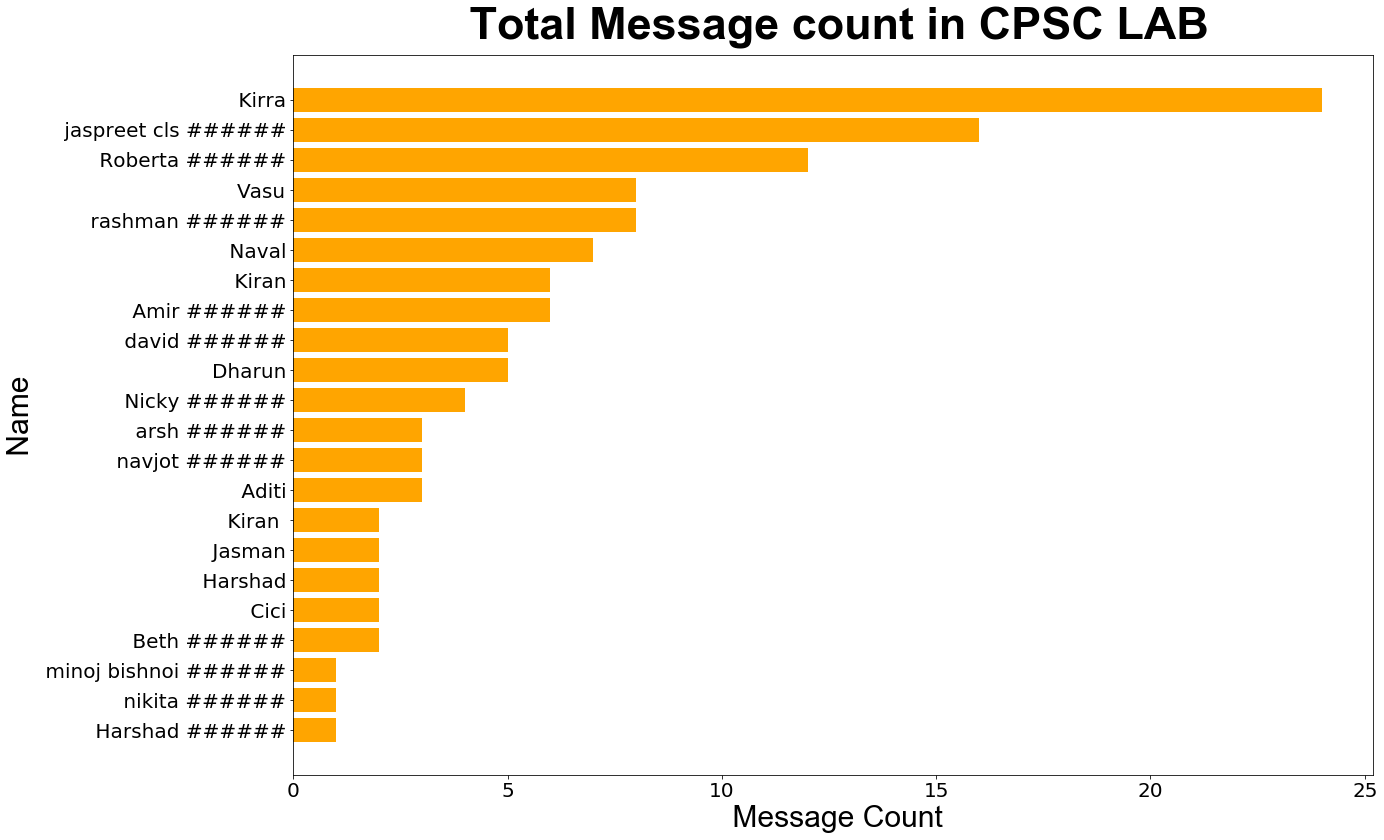

In [181]:
#Groupby by names to get total number of messages in term3

#creating a data frame for Term 3 and for Wednesday
Total_number_of_messages_term3Lab=pd.DataFrame(data1[(data1.Date.dt.month>=5) & (data1.Date.dt.month<=7) &
                                                (data1.Date.dt.year == 2020) & 
                                                 (data1.Weekdays == "Wednesday") 
                                               ])

# set date as index because in next step we need to filter data as per time 
Total_number_of_messages_term3Lab.set_index("Date", inplace= True)

# filtering data as per time and 
#creating a new data frame for the messages count in between 4:30 PM and 6:30 pm
Total_number_of_messages_term3Lab =pd.DataFrame(Total_number_of_messages_term3Lab.between_time("16:30",
    "18:30").groupby("Name").Messages.count())


#Creating a sorted dataframe in term3
Total_number_of_messages_term3Lab =pd.DataFrame(Total_number_of_messages_term3Lab["Messages"].sort_values(ascending=True))

# Simple horizontal Plot for term3
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])

# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'45', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'30'}

# Set Label and Title 
plt.xlabel(" Message Count", **axis_font)
plt.ylabel(" Name ", **axis_font)
plt.title(" Total Message count in CPSC LAB", **title_font)


# Set Tick label Size 
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

ax.barh(Total_number_of_messages_term3Lab.index,Total_number_of_messages_term3Lab.Messages,color="orange")
plt.show()

# Number of Messages during DANA 4830

In [182]:
Image(url='Studenttalk.gif') 

In [183]:
#Groupby by names to get total number of messages in term3

#creating a data frame for Term 3 and for DANA 4830
Total_number_of_messages_DANA4830=pd.DataFrame(data1[(data1.Date.dt.month>=5) & (data1.Date.dt.month<=7) &
                                                (data1.Date.dt.year == 2020) & 
                                                 ((data1.Weekdays == "Tuesday")|(data1.Weekdays == "Thursday")) 
                                               ])

# set date as index because in next step we need to filter data as per time 
Total_number_of_messages_DANA4830.set_index("Date", inplace= True)

# filtering data as per time and 
#creating a new data frame for the messages count in between 4:30 PM and 6:30 pm
Total_number_of_messages_DANA4830 =pd.DataFrame(Total_number_of_messages_DANA4830.between_time("16:30",
    "18:30").groupby("Name").Messages.count())


#Creating a sorted dataframe in term3
Total_number_of_messages_DANA4830 =pd.DataFrame(Total_number_of_messages_DANA4830["Messages"].sort_values(ascending=True))

# Simple horizontal Plot for term3
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])

# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'45', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'30'}

# Set Label and Title 
plt.xlabel(" Message Count", **axis_font)
plt.ylabel(" Name ", **axis_font)
plt.title(" Total Message count in DANA 4830", **title_font)


# Set Tick label Size 
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

ax.barh(Total_number_of_messages_DANA4830.index,Total_number_of_messages_DANA4830.Messages,color="pink")
plt.show()

# Number of Messages per Month 

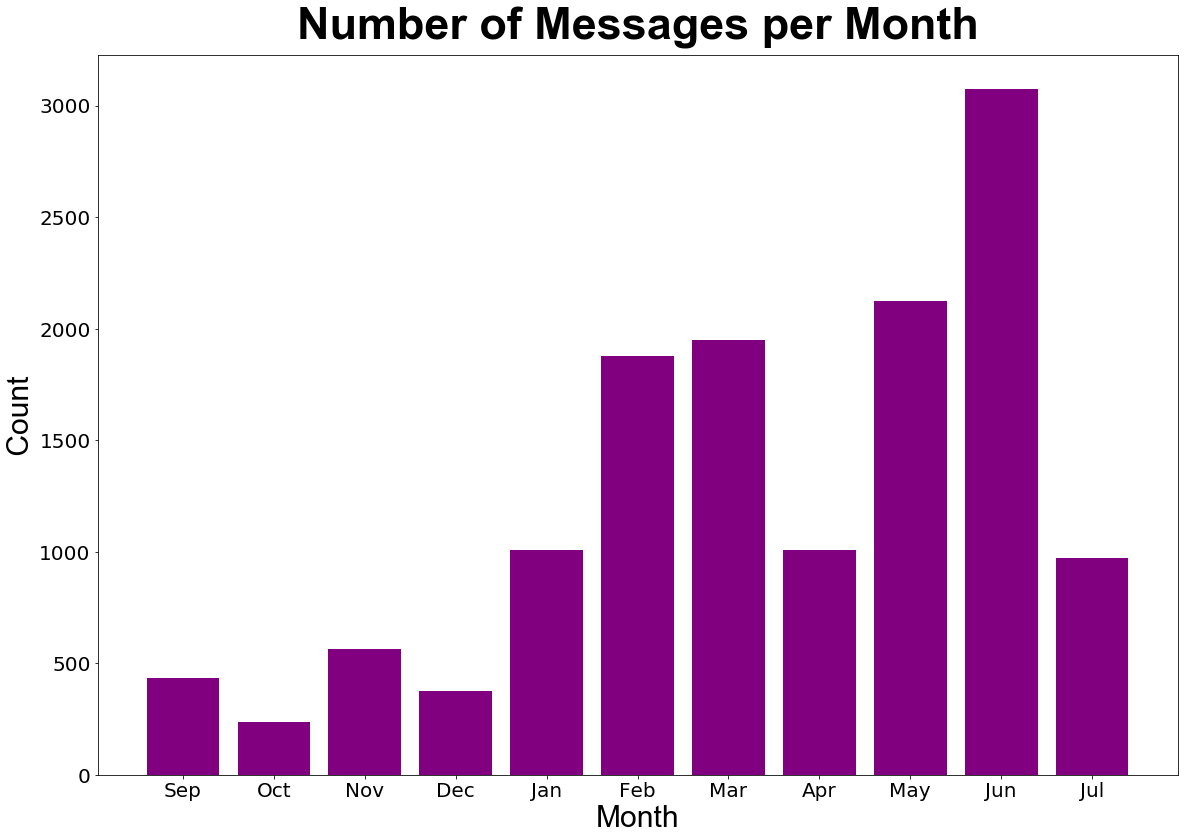

In [184]:
# Extracting months in a List and creating a month column with it  
Month=[]
for i in list(data1.Date.dt.month):
    Month.append(calendar.month_abbr[i])

data1["Month"]= Month

#Create df for graph
x=pd.DataFrame(data1.groupby("Month").Messages.count())
x.reset_index(inplace=True)
x=x.reindex([10,9,8,1,3,2,6,0,7,5,4])

fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])

# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'45', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'30'}

# Set Label and Title 
plt.xlabel("Month", **axis_font)
plt.ylabel(" Count ", **axis_font)
plt.title("Number of Messages per Month", **title_font)


# Set Tick label Size 
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

ax.bar(x.Month,x.Messages,color="purple")
plt.show()

# Total message count per month for each student

In [185]:
# Creating a line chart in Altier that shows total message per month for each student 

# Creating a new data frame which has message count per month for each student 
df=pd.DataFrame(data1['Messages'].groupby([data1.Month,data1.Name]).count())

# Reset the index 
df.reset_index(inplace=True)

# Generate a month list 
month= ['Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul']

# Binding Values for our dropdown 
input_dropdown = alt.binding_select(options=list(set(df.Name.unique())))

# selection
selected_points = alt.selection_single(fields=['Name'], bind=input_dropdown, name='Select')

#color 
color = alt.condition(selected_points,
alt.Color('Name:N'),
alt.value('transparent'))

# Define Chart 
alt.Chart(df, width=730, height=490).mark_line().encode(
x=alt.X('Month',sort=month ),
y='Messages',
color=color,
tooltip='Name:Q'
).add_selection(selected_points)



alt.Chart(...)

# Total Message Count Per day for each month

In [186]:
# Most chat on the day

In [187]:
# Creating a new data frame which has message count per day 

df1=pd.DataFrame(data1["Messages"].groupby([data1.Month,data1.Date.dt.day]).count())

# Resting index
df1.reset_index(inplace=True)

# Binding Values for our dropdown 
input_dropdown1 = alt.binding_select(options=list(set(df1.Month.unique())))

#selection 
selected_points1 = alt.selection_single(fields=['Month'], bind=input_dropdown1, name='Select')

# color  
color = alt.condition(selected_points1,alt.Color('Month:N'),alt.value('transparent'))

# define Chart
alt.Chart(df1, width=730, height=500).mark_line().encode(
x='Date:Q',
y='Messages',
color=color,
tooltip='Month:Q'
).add_selection(selected_points1)



alt.Chart(...)

# Which day i spend more time on study group

In [188]:
# Creating a new data frame which has total message count for every week 
df2=pd.DataFrame(data1["Messages"].groupby([data1.Name,data1.Weekdays]).count())
df2.reset_index(inplace=True)

# Binding Values for our dropdown 
input_dropdown = alt.binding_select(options=list(set(df2.Name.unique())))

#Selection 
selected_points = alt.selection_single(fields=['Name'], bind=input_dropdown, name='Select')

#Color 
color = alt.condition(selected_points,
alt.Color('Name:N'),
alt.value('transparent'))

#Define Chart 
alt.Chart(df2, width=800, height=500).mark_line().encode(
x=alt.X('Weekdays',sort=sorter ),
y='Messages',
color=color,
tooltip='Messages'
).add_selection(selected_points)

alt.Chart(...)

In [189]:
output_notebook()

Loading BokehJS ...

# Pie Chart to represent proportion of messages sent 

In [190]:
# Create a dataframe to to count messages for each student 
data3 = pd.DataFrame(data1.groupby("Name").Messages.count())

# sorting values of message count 
Contribute=data3.sort_values("Messages",ascending=False)

# Checking sum of messages after 15th observation
Contribute.iloc[15:].Messages.sum()

# temp df to store first 15 data points 
x=Contribute.iloc[0:15]

# adding a new data point to temp df as Other 
x.loc["Other"]=[2273]

# Reseting Index 
x.reset_index(inplace=True)

x=pd.DataFrame(x)

C:\Users\vasu2\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [191]:
#Preparing DataSet
data=x
data['angle'] = data['Messages']/data['Messages'].sum() * 2*pi
data['color'] = Category20c[len(x)]
data['percent'] = (data['Messages'] / x.Messages.sum()) * 100

p = figure(plot_height=600, title="Most Contributer Student", toolbar_location=None,
        tools="hover", tooltips="@Name: @percent{0.2f} %")

p.wedge(x=0, y=0, radius=0.95,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="black", fill_color='color', source=data)

p.axis.visible = False

show(p)

# Count of Messages on Each Day

In [192]:
#Preparing DataSet
data2=data1#Crating Copy
data2["DATE"]=data2.Date.dt.date #Add another column of only date
DateCount=pd.DataFrame(data2.groupby("DATE").Messages.count()) #Make new data frame of only date and count of messages
DateCount.reset_index(inplace=True)

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(DateCount.DATE), y=list(DateCount.Messages)))

# Set title
fig.update_layout(
    title="Time series with range slider",
     yaxis_title="Message Count",
     font=dict(family="Courier New, monospace",
        size=18,
        color="#FECB52"))

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1month",
                     step="month",
                     stepmode="backward"),
                dict(count=2,
                     label="2months",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6months",
                     step="month",
                     stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()

In [193]:
Image(url='coronavirus.gif') 

In [194]:
#Read DataSet
covid=pd.read_excel('owid-covid-data (1).xlsx')
covid.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2019-12-31          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-01          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-02          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-03          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-04          0.0        0.0   

   total_deaths  new_deaths  total_cases_per_million  new_cases_per_million  \
0           0.0         0.0                      0.0                    0.0   
1           0.0         0.0                      0.0                    0.0   
2           0.0         0.0                      0.0                    0.0   
3           0.0         0.0                      0.0                    0.0   
4           0.0         0.0                      0.0                    0.0   

   ...  aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0  ...          1.337        1803.987              NaN                597.029   
1  ...          1.337        1803.987              NaN                597.029   
2  ...          1.337        1803.987              NaN                597.029   
3  ...          1.337        1803.987              NaN                597.029   
4  ...          1.337        1803.987              NaN                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             NaN           NaN                  37.746   
1                 9.59             NaN           NaN                  37.746   
2                 9.59             NaN           NaN                  37.746   
3                 9.59             NaN           NaN                  37.746   
4                 9.59             NaN           NaN                  37.746   

  hospital_beds_per_thousand  life_expectancy  
0                        0.5            64.83  
1                        0.5            64.83  
2                        0.5            64.83  
3                        0.5            64.83  
4                        0.5            64.83  

[5 rows x 34 columns]

In [195]:
#Create a copy of data
codf=covid

#Removing All null values
codf.dropna(inplace=True)

In [196]:
# Number of continent
codf.continent.unique()

array(['Asia', 'South America', 'North America', 'Africa'], dtype=object)

In [197]:
#total deaths in all continents due to covid
df=codf['total_deaths'].groupby(codf.continent).sum()
df=pd.DataFrame(df)

#Fig size
fig = plt.figure(figsize=(15,10))
ax = fig.add_axes([0,0,1,1])

#Set Layout
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'45', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'30'}

# Set Label and Title 
plt.xlabel("Continent", **axis_font)
plt.ylabel("Total Death", **axis_font)
plt.title("Total deaths in all continents", **title_font)

# Set Tick label Size 
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

#BAr graph
plt.bar(df.index,df['total_deaths'],color="red")

<BarContainer object of 4 artists>

In [198]:
#we were interested in Asia so we look for countries in Asia and filter our data for 'Asia'
codf_Asia=codf[codf['continent']=='Asia']

#total deaths in all Asian countries 
Covid_Asia=pd.DataFrame(codf_Asia['total_deaths'].groupby(codf['location']).sum())
Covid_Asia.reset_index(inplace=True)

Covid_Asia['angle'] = Covid_Asia['total_deaths']/Covid_Asia['total_deaths'].sum() * 2*pi
Covid_Asia['color'] = Category20c[len(Covid_Asia)]
Covid_Asia['percent'] = (Covid_Asia['total_deaths'] / Covid_Asia.total_deaths.sum()) * 100

p = figure(plot_height=600, title="Death Percentage per Continent",toolbar_location=None,
        tools="hover", tooltips="@location: @percent{0.2f} %")

p.wedge(x=0, y=0, radius=0.6,
        start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
        line_color="black", fill_color='color', legend="location",source=Covid_Asia)



p.axis.visible = False

show(p)

In [199]:
codf['date'] =  pd.to_datetime(codf['date'],format="%Y-%m-%d")

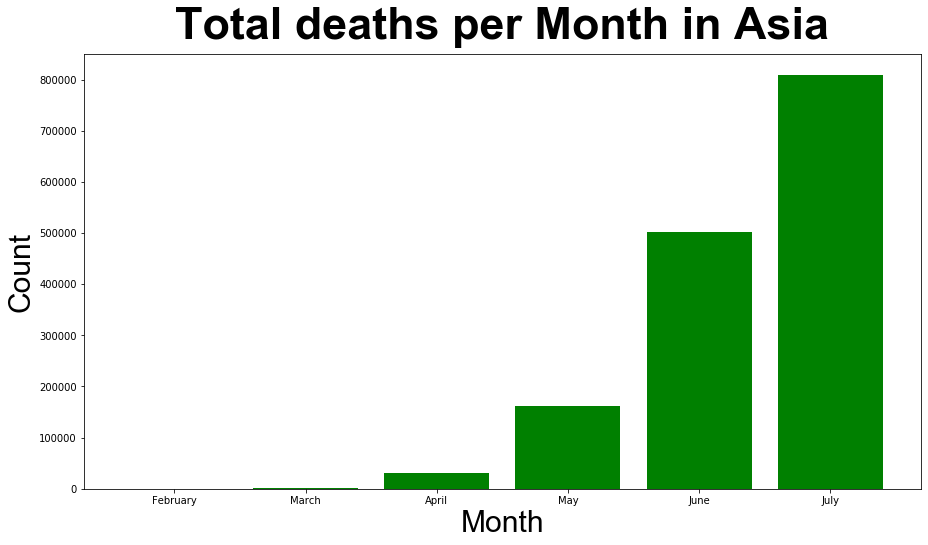

In [200]:
 #total deaths in each month due to covid
codf_Asia=codf[codf['continent']=='Asia']

codf_Asia['total_deaths'].groupby(codf_Asia['date'].dt.month).sum()

dd=codf_Asia['total_deaths'].groupby(codf['date'].dt.month).sum()
dd=pd.DataFrame(dd)
dd

#plot of deaths for each month
plt.figure(figsize=(15,8))

#Set Layout
# Set the font dictionaries (for plot title and axis titles)
title_font = {'fontname':'Arial', 'size':'45', 'color':'black', 'weight':'bold',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'30'}

# Set Label and Title 
plt.xlabel("Month", **axis_font)
plt.ylabel("Count", **axis_font)
plt.title("Total deaths per Month in Asia", **title_font)

# Set Tick label Size 
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(20)

plt.bar(dd.index,dd['total_deaths'],color="green")
plt.xticks([2,3,4,5,6,7],['February','March','April','May','June','July'])

plt.show()

In [201]:
filter=codf[['iso_code','date','total_deaths',"location"]]

filter.sort_values(by=['date'], inplace=True)

#filter data for June as highest number of deaths occur in June
Peak = filter[(filter['date']>='2020-06-01')&(filter['date']<'2020-07-01')]

#geoplot of total deaths in June
fig=px.choropleth(Peak,
                  color="total_deaths",color_continuous_scale=px.colors.sequential.Reds,
                  locations="iso_code")

#Update the layout
fig.update_layout(
title_text = 'Total deaths in June 2020 due to Covid',
geo = dict(projection={'type':'orthographic'}) 
)
fig.show()

C:\Users\vasu2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [202]:
#Df for the cases after month 6
codf_later=codf[codf['date'].dt.month>6]


#new cases after June in all countries of all continents
df=pd.DataFrame(codf_later['new_cases'].groupby([codf_later['continent'],codf_later['location']]).sum())
df.reset_index(inplace=True)

#new cases in countries of all continents
def my_function(con):

    selected_points = alt.selection_single(fields=['Continents'], name='Select')
    color = alt.condition(selected_points,
    alt.Color('continent:N'),
    alt.value('lightgrey')
    )
    temp = alt.Chart(df [df['continent'].str.match(con)]).mark_bar().encode(
    x='location:N',
    y='new_cases:Q',
    color=color,
    tooltip='continent:N'
    ).add_selection(selected_points)
    
    
    return temp
    

# With drop down Menu

In [203]:
# for drop down
options = [('Asia','Asia'),('Africa','Africa'),('North America','North America'),('South America','South America')]
interact(my_function,con=options)

interactive(children=(Dropdown(description='con', options=(('Asia', 'Asia'), ('Africa', 'Africa'), ('North Ame…

<function __main__.my_function(con)>

# Association between life expectancy and handwashing facilities


In [204]:
Image(url='handwash.gif') 

In [205]:
#association between life expectancy and handwashing facilities
alt.Chart(codf).mark_rect().encode(
alt.X('handwashing_facilities:Q', bin=True),
alt.Y('life_expectancy', bin=True),
alt.Color('count()',
scale=alt.Scale(scheme='greenblue'),
legend=alt.Legend(title='Betterment')
)
).properties(width=350)


alt.Chart(...)

In [206]:
co20=codf[codf.date.dt.year==2020]
co20['month']=co20.date.dt.month
co10=co20[co20['month']>=3]

xmin, xmax = min(co10.total_cases), max(co10.total_cases)
ymin, ymax = min(co10.total_deaths), max(co10.total_deaths)

#interactive scatter plot between total deaths and total cases in all continents for all months 
fig = px.scatter(co10, x="total_cases", y="total_deaths", animation_frame='month',
animation_group="location", color="continent", hover_name="location",
facet_col="continent")

fig.show()

In [207]:
codf.head()

iso_code continent    location       date  total_cases  new_cases  \
2564      BGD      Asia  Bangladesh 2020-03-15          3.0        0.0   
2566      BGD      Asia  Bangladesh 2020-03-17          5.0        2.0   
2567      BGD      Asia  Bangladesh 2020-03-18          8.0        3.0   
2568      BGD      Asia  Bangladesh 2020-03-19         10.0        2.0   
2569      BGD      Asia  Bangladesh 2020-03-20         10.0        0.0   

      total_deaths  new_deaths  total_cases_per_million  \
2564           0.0         0.0                    0.018   
2566           0.0         0.0                    0.030   
2567           0.0         0.0                    0.049   
2568           0.0         0.0                    0.061   
2569           0.0         0.0                    0.061   

      new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
2564                  0.000  ...          3.262        3523.984   
2566                  0.012  ...          3.262        3523.984   
2567                  0.018  ...          3.262        3523.984   
2568                  0.012  ...          3.262        3523.984   
2569                  0.000  ...          3.262        3523.984   

      extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
2564             14.8                298.003                 8.38   
2566             14.8                298.003                 8.38   
2567             14.8                298.003                 8.38   
2568             14.8                298.003                 8.38   
2569             14.8                298.003                 8.38   

      female_smokers  male_smokers  handwashing_facilities  \
2564             1.0          44.7                  34.808   
2566             1.0          44.7                  34.808   
2567             1.0          44.7                  34.808   
2568             1.0          44.7                  34.808   
2569             1.0          44.7                  34.808   

     hospital_beds_per_thousand  life_expectancy  
2564                        0.8            72.59  
2566                        0.8            72.59  
2567                        0.8            72.59  
2568                        0.8            72.59  
2569                        0.8            72.59  

[5 rows x 34 columns]

In [208]:
df_new=pd.DataFrame(codf.groupby("continent")["extreme_poverty","diabetes_prevalence","handwashing_facilities","life_expectancy"].mean())

In [209]:
df_new.reset_index(inplace=True)
df_new

continent  extreme_poverty  diabetes_prevalence  \
0         Africa        24.357768             5.499638   
1           Asia         8.521748             7.485983   
2  North America         2.057702            10.757775   
3  South America         3.274599             7.163128   

   handwashing_facilities  life_expectancy  
0               37.338210        66.131312  
1               66.110187        71.339542  
2               87.254147        76.272152  
3               74.777142        76.166471

In [210]:
x=df_new.iloc[:,1:5]

In [211]:
categories = ['Poverty','Diab_Death',
              'Handwash_Facility', 'Life_Expentancy']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=list(x.iloc[0]),
      theta=categories,
      fill='toself',
      name='Africa'
))
fig.add_trace(go.Scatterpolar(
      r=list(x.iloc[1]),
      theta=categories,
      fill='toself',
      name='Asia'
))
fig.add_trace(go.Scatterpolar(
      r=list(x.iloc[2]),
      theta=categories,
      fill='toself',
      name='North America'
))
fig.add_trace(go.Scatterpolar(
      r=list(x.iloc[3]),
      theta=categories,
      fill='toself',
      name='South America'
))



fig.show()

In [212]:
codf.head()

iso_code continent    location       date  total_cases  new_cases  \
2564      BGD      Asia  Bangladesh 2020-03-15          3.0        0.0   
2566      BGD      Asia  Bangladesh 2020-03-17          5.0        2.0   
2567      BGD      Asia  Bangladesh 2020-03-18          8.0        3.0   
2568      BGD      Asia  Bangladesh 2020-03-19         10.0        2.0   
2569      BGD      Asia  Bangladesh 2020-03-20         10.0        0.0   

      total_deaths  new_deaths  total_cases_per_million  \
2564           0.0         0.0                    0.018   
2566           0.0         0.0                    0.030   
2567           0.0         0.0                    0.049   
2568           0.0         0.0                    0.061   
2569           0.0         0.0                    0.061   

      new_cases_per_million  ...  aged_70_older  gdp_per_capita  \
2564                  0.000  ...          3.262        3523.984   
2566                  0.012  ...          3.262        3523.984   
2567                  0.018  ...          3.262        3523.984   
2568                  0.012  ...          3.262        3523.984   
2569                  0.000  ...          3.262        3523.984   

      extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
2564             14.8                298.003                 8.38   
2566             14.8                298.003                 8.38   
2567             14.8                298.003                 8.38   
2568             14.8                298.003                 8.38   
2569             14.8                298.003                 8.38   

      female_smokers  male_smokers  handwashing_facilities  \
2564             1.0          44.7                  34.808   
2566             1.0          44.7                  34.808   
2567             1.0          44.7                  34.808   
2568             1.0          44.7                  34.808   
2569             1.0          44.7                  34.808   

     hospital_beds_per_thousand  life_expectancy  
2564                        0.8            72.59  
2566                        0.8            72.59  
2567                        0.8            72.59  
2568                        0.8            72.59  
2569                        0.8            72.59  

[5 rows x 34 columns]

In [213]:
#Preparing DataSet
Data2=codf
DateCount=pd.DataFrame(Data2.groupby("date").total_deaths.count()) #Make new data frame of only date and count of messages
DateCount.reset_index(inplace=True)

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(x=list(DateCount.date), y=list(DateCount.total_deaths)))

# Set title
fig.update_layout(
    title="Time series with range slider",
     yaxis_title="Death Count",
     font=dict(family="Courier New, monospace",
        size=18,
        color="#FECB52"))

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1month",
                     step="month",
                     stepmode="backward"),
                dict(count=2,
                     label="2months",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6months",
                     step="month",
                     stepmode="backward"),
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)

fig.show()